
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 72</p>
## <p style="text-align: center;">Due: Tuesday, February 22nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

## Name: Xiaocheng Shen (xs2948)
## Name: Dawei Liang (dl33629)

# Question 1: Ridge and Lasso Regression (20 points)
Use the following code to import the dow_jones dataset.

In [3]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

You will reuse the same dataset that you used in HW1. In this HW, you will add additional second-order polynomial and interaction variables to the features matrix. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{6}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation on each model. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? What do you observe about the coefficients returned from the ridge and lasso models? (5pts)


3) What are the top 10 most important features for the lasso and ridge models for the hyperparameters that got the best MSE? (2pts)


4) SKLearn can perform this cross validation for us and choose the best regularization hyper-parameter. It will automatically determine the range of $\lambda$ s to search over. Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

    Report the best $\lambda$ based on cross validation. (3 pts)
    
5) 
    i) Run Ridge, lasso with the best hyperparameters and report the MSE on test data. 
    ii) Run OLS on the training data with all the features and then with the features selected through lasso (features with non zero weights). Report the MSE on test data. (5 pts)

## Answer

In [16]:
#1) 

import sys
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold

alphas =  10**np.linspace(6,-2,100)*0.5
lasso = Lasso(random_state=0)
ridge = Ridge(random_state=0)

lambda1 = 0
lambda2 = 0

mseLas1 = sys.maxsize
mseLas2 = sys.maxsize

for alpha in alphas:
    mse1 = 0
    mse2 = 0
    
    kf = KFold(X_train.shape[0], n_folds=5)
    
    for train_index, test_index in kf:
        xv_train, xv_test = X_train[train_index], X_train[test_index]
        yv_train, yv_test = y_train[train_index], y_train[test_index]
        
        rg1 = Lasso(alpha= alpha)
        rg2 = Ridge(alpha= alpha)
        
        rg1.fit(xv_train, yv_train)
        rg2.fit(xv_train, yv_train)
        
        mse1 += np.mean((rg1.predict(xv_test) - yv_test) ** 2)
        mse2 += np.mean((rg2.predict(xv_test) - yv_test) ** 2)
        
    mse1 /= 5
    mse2 /= 5
    
    if(mse1 < mseLas1):
        lambda1 = alpha
        mseLas1 = mse1
    
    if(mse2 < mseLas2):
        lambda2 = alpha
        mseLas2 = mse2
        
print "lambda of Lasso: ", lambda1
print "MSE of Lasso: " , mseLas1

print "lambda of Ridge: " , lambda2
print "MSE of Ridge: " , mseLas2



lambda of Lasso:  0.00873764200004
MSE of Lasso:  0.152819958698
lambda of Ridge:  0.005
MSE of Ridge:  0.00358127472071


The best chosen $\lambda$ of two models are shown above.

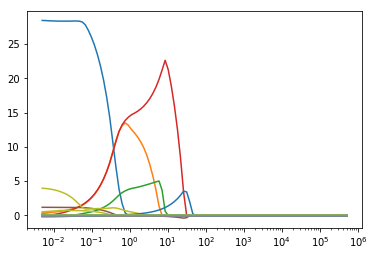

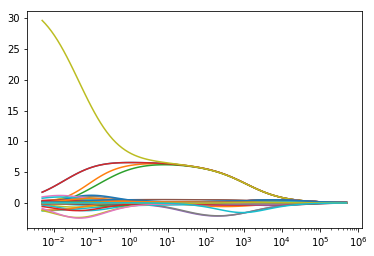

In [23]:
#2) 

cof_lasso = []
cof_ridge = []

for alpha in alphas:
    rg1 = Lasso(alpha = alpha)
    rg1.fit(X_train, y_train)
    cof_lasso.append(rg1.coef_)
    
    rg2 = Ridge(alpha = alpha)
    rg2.fit(X_train, y_train)
    cof_ridge.append(rg2.coef_)

plt.figure()
plt.semilogx(alphas, cof_lasso)
plt.figure()
plt.semilogx(alphas, cof_ridge)


For both the Lasso and Ridge methods, the coefficients will become 0 when $\lambda$ becomes large enough. For the Lasso method, the coefficient becomes 0 earlier than the Ridge and can generate different models when $\lambda$ is diffrent. But for the Ridge method, the change is more smooth and all the coefficients will become 0 when $\lambda$ reaches a same value.

In [ ]:
#3)

In [25]:
#4)

from sklearn.linear_model import LassoCV
lassoCV = LassoCV(alphas=None, cv=10, max_iter=10000)
rg = lassoCV.fit(X_train, y_train)
lambda_ = rg.alpha_
cof = rg.coef_

print "Best lambda: ", lambda_
print "Coef for LassoCV: ", cof

Best lambda:  0.0466112165952
Coef for LassoCV:  [  0.00000000e+00   2.53525574e+00   2.16556032e+00   1.91278452e+01
  -0.00000000e+00   5.39972624e-02   0.00000000e+00  -0.00000000e+00
   9.06155486e+00  -3.72584773e-01  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   2.72372354e-02   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -2.25561293e-01  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   7.74405274e-04  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -1.06866344e-03
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -

In [27]:
#5-1

rg_lasso = Lasso(alpha= 0.00873764200004)
rg_lasso.fit(X_train, y_train)
mse_lasso = np.mean((rg_lasso.predict(X_test) - y_test) ** 2)

rg_ridge = Ridge(alpha= 0.005)
rg_ridge.fit(X_train, y_train)
mse_ridge = np.mean((rg_ridge.predict(X_test) - y_test) ** 2)

print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)


('Lasso MSE:', 0.15983136817356811)
('Ridge MSE:', 0.0019317330320837991)


In [64]:
#5-2
import statsmodels.api as sm 

mse = 0

model = sm.OLS(y_train, X_train)
results = model.fit()

mse = np.mean((results.predict(X_train) - y_train) ** 2)


print(mse)

index = []
#print len(X_train)
training_data = X_train[:,0]

for i in range(len(cof)):
    if cof[i] != 0:
        index.append(i)
        #trainning_data.append(X_train[:,i])
        #print X_train[:,i].shape
        training_data = np.vstack((training_data, X_train[:,i]))
training_data = training_data.T
print(training_data[:,] - X_train[:,i])
training_data = training_data[:,1:]
model2 = sm.OLS(y_train, training_data)
results2 = model2.fit()

mse2 = np.mean((results2.predict(training_data) - y_train) ** 2)

print(mse2)


    
        
        



6.82125729259e-05
[ -5.95252040e+00   2.63259230e-01  -4.25528130e+00  -5.26409647e+00
  -6.15814599e-01  -6.05426754e+00  -4.67168385e+00   1.85069423e-01
  -6.66924224e-02   3.97927863e+00  -3.82770077e-01   6.31344034e-02
  -4.55650299e-01  -1.69227105e-01  -9.01722045e-02  -4.28013822e+00
  -2.82934465e-02  -8.08364137e-01  -8.41594062e-01  -7.76138345e-01
  -4.08486927e-01   9.47944785e-01  -4.66982102e-01  -5.61372907e-01
  -2.73461174e+00   5.10303053e-01  -5.95641863e-01  -8.72064195e+00
  -3.42650742e+00  -5.63637543e-01  -1.67917585e+00  -1.36803278e+00
  -1.76679484e-02  -5.70740764e+00  -2.36484597e+00  -3.40367159e+00
   2.17569088e-01  -1.46821102e+00  -1.31482518e+00   3.09998397e-01
  -5.75499117e-01  -4.26603602e+00  -3.84791300e-01  -1.58747976e+00
   8.62321829e-02   1.57896520e-02  -2.78475820e-01  -8.99928766e-01
  -2.44054709e-01  -1.20359572e+00  -1.28604223e+00  -5.21690065e+00
  -2.40645549e-01   6.64319015e-01  -5.15716489e+00  -4.12780406e+00
  -2.01888879e+0

# Question 2: Bias-Variance Tradeoff (5 points)

1. Describe the relationship between Ordinary Least Squares and Ridge Regression (the problem analyzed in the previous question) with reference to Bias-Variance trade-off.
3. Which is a higher variance model, kNN with k = 1 or with k = 10?

# Question 3 - Principal Component Analysis (15 points)

Import the same dataset with the interaction variables as in Q1.

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna()
X = df[[u'open', u'high', u'low', u'close',
       u'volume', u'percent_change_price',
       u'percent_change_volume_over_last_wk', u'previous_weeks_volume', u'next_weeks_close',
       u'percent_change_next_weeks_price', u'days_to_next_dividend',
       u'percent_return_next_dividend']]
X = X.as_matrix()

for feat in range(X.shape[1]):
    try:
        if "$" in X[0, feat]:
            X[:,feat] = [i.split("$")[1] for i in X[:,feat]]
    except:
        pass
X = X.astype('float')
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

y = df[[u'next_weeks_open']]
y = y.as_matrix()
y = [i.split("$")[1] for i in y[:, 0]]
y = np.array(y)
y = y.astype('float')

In [14]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X_train matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. How many principal components (N1, N2, N3) are required to explain cumulative variance of 90%, 95%, and 99%, respectively? (6 pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. Fit PCA on X_train and predict on X_test. Compare the test MSE using N1, N2, N3 to using all features from PCA (6 pts)

(d) Compare this to the MSE reported in Q1.For this dataset, would you use PCA/Lasso as a feature elimination technique based on: (3 pts)
i) Interpretability of results
ii) MSE value
iii) Hyperparameter tuning?

## Answer

# Question 4 - Sampling (3+2=5pts)

1 . Your firm is conducting a customer survey for a new product. You are tasked with estimating whether the product will be liked or disliked by the entire market. Unfortunately, you cannot reach all the customers. So you randomly sample 400 participants and ask them "Will you like the product" as a question. The responses are evenly split. But you attended a Data Mining course, so you know the estimate is not simply 50%. 
   
What are the lower and upper bounds of probability corresponding to a confidence of 99% ($\alpha = 0.99$)?


2 . Your manager asks you to halve the probability range you reported in part 1. This can be accomplished in two different ways:

    a) Reduce the confidence without going below 90%. 
    OR
    b) Conduct a new survey to acquire more samples. In this case let us assume that the results are again evenly split.
    
Which option is viable? If a), what is the highest confidence you can use? And if b), how many samples do you need?

## Answer

# Question 5: Ridge and Lasso Regression (15 points)
The ridge regression problem is characterized by the following loss function:
$$\mathcal{L}(\beta) = ||X \beta - y||_2^2 + \lambda ||\beta||^2_2$$

The ridge regression problem is the case where the penalty term ($\lambda ||\beta||$) uses the squared l-2 norm ($\lambda ||\beta||^2$).

a) Find the closed form solution to the ridge regresion problem
$$\underset{\beta}{\mathrm{argmin}} \mathcal{L}(\beta)$$
where $\mathcal{L}(\beta)$ is the loss function above.

b) Now given the SVD of $X$ as $U \Sigma V^T$, express $X \hat \beta_{ridge}$ in terms of $U$, $V$ and $\Sigma$

c) Explain what the expression for $X \hat \beta_{ridge}$ derived above tells us about how the addition of the regularization term affects the solution. (Hint: think about $\lambda ||\beta||^2$ as a penalty term)

# Answer

# Question 6 - Outliers and Huber Loss (12 pts)

In this problem, we will use the same data set from the previous problem set to fit a linear model to the data using a Huber loss function rather than the l-2 norm usually used in OLS. sklearn has a nice API you can use: [http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor)

Below is a snippet from the previous problem set to help you get started. For this problem, the only independent variable will be the "percent\_change\_price" feature.


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dow_jones_index.data')
stock = df[["percent_change_price", "next_weeks_open"]]
stock = stock.dropna()
stock = stock.as_matrix()[1:]
stock[:, 1] = [i.split("$")[1] for i in stock[:, 1]]
stock = stock.astype('float')
stock[:, 0] = (stock[:, 0] - np.mean(stock[:, 0], axis=0))/np.std(stock[:, 0], axis=0)

X = stock[:,:1]
y = stock[:, 1]
X_train = X[:400,]
y_train = y[:400]

X_test = X[400:,]
y_test = y[400:,]

clf_train = linear_model.LinearRegression()
clf_train.fit(X_train, y_train)
predictions_train = clf_train.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('MSE train: ', mse_train)

predictions_test = clf_train.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('MSE test: ', mse_test)

a) Now do the same for the Huber loss function and print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [ ]:
# ANSWER

Now let's artificially introduce some errors intro the train set:

In [ ]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 10000.0

Note that we would never actually do this in a real application, this is simply for demo purposes.

b) Now create two models as before, but using the new y vector during training (one model using OLS and another using the Huber loss). Print the test and train MSE. Use a regularization coefficient of 0. (5 pts)

In [1]:
# ANSWER

c) Explain the difference in prediction performance of the two models in these two scenarios (one without significant outliers in the data, and the other with a single outlier). (2 pts)